# Question1

The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. 



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


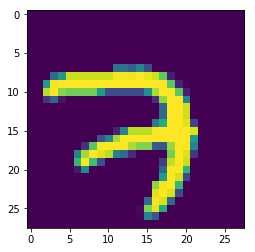

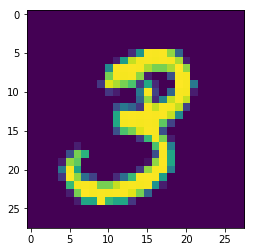

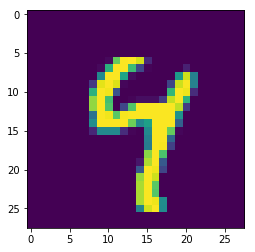

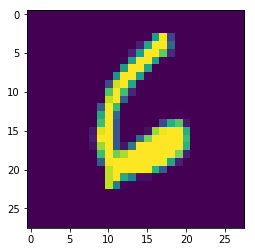

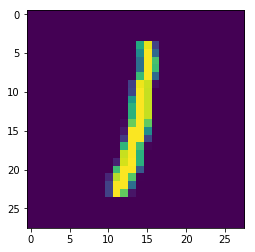

In [5]:
import matplotlib.pyplot as plt                                #import mat plot lib for plotting the the matrix
from tensorflow.examples.tutorials.mnist import input_data     #imported data of MNIST using tensor flow routines
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)     #read datasets from input_data
plotData=mnist.train.images[0:50]                              #mnist.train.images is a tensor (an n-dimensional array) with a shape of [50, 784]
plotData = [plotData[i].reshape(28, 28) for i in range(5)]     #we take five samples of 50 and try to reshape this flatten array of 1 *784 into a vector of 28*28 
for pd in plotData:                                            #We plot this 28*28 using matplotlib plt 
    plt.imshow(pd)
    plt.show()


In [ ]:
## References:-
----------------------------------------------------------------------
Article title: MNIST For ML Beginners  |  TensorFlow
Website title: TensorFlow
URL: https://www.tensorflow.org/get_started/mnist/beginners

# Question2



The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
Attributes:-
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

class:-
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [11]:
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def AccuracyPredictor(train_data,train_target,test_data,test_target):  #Accuracy predictor method created 
    model = svm.SVC( kernel="linear")               #svm classifier 
    model2=RandomForestClassifier(n_estimators=100) #randomforest classifier
    model.fit (train_data , train_target)   #traindata and train target fit into model
    model2.fit(train_data , train_target)
    prediction1=model.predict (test_data)   #we predict the test data
    prediction2=model2.predict (test_data)
    acc1=np.mean(test_target==prediction1) #mean of values where testvalue equals predicted bvalue is returned 
    acc2=np.mean(test_target==prediction2)

    return acc1,acc2

def CV_UsingSklear(iris):            #CV_UsingSklearn method created
    clf=svm.SVC(kernel="linear",C=1) #SVM classfier 
    clf2 = RandomForestClassifier(n_estimators=100) #RandomForest Classifier
    kfold = StratifiedKFold(10,shuffle=False) #stratified K fold for mean distribution of classes in each set
    scores = cross_val_score(clf, iris.data, iris.target, cv=kfold) #cross_val_score called passing classifier and data 
    scores2=cross_val_score(clf2, iris.data, iris.target, cv=kfold)
    print "Using sklearn Cross_val_score SVM classifier accuracy  ",np.array(scores).mean()       #accuracies printed for both svm and random forest classifier
    print "Using sklearn Cross_val_score RandomForest classifier accuracy ",(np.array(scores2).mean())


def CV_WithoutSklear(iris_data, datalen):  #startified method for cross validation created
    Class_classificarion = {}       
    for i in iris_data:
        Class_classificarion.setdefault(i[1], []).append(i[0])   # data divided on basis of class, each data is bundled into same class
    K  = 10      #no of folds
    tlen = datalen / K
    step_list = []
    for data in Class_classificarion.values():        #step length for each class in steplist
        step_list.append(tlen * len(data) * 1.0 / datalen)
    list = []
    for k in range(K):
        train_set = []  #train_set,test)set,train_target,test_target created 
        test_set = []
        test_target = []
        train_target = []
        for c, v in Class_classificarion.iteritems(): #test and train split into folds with mean distribution 
            step = step_list[c]
            step = int(step)
            test_set.extend(v[k * step:k * step + step])
            test_target.extend(c for i in range(step))
            train_set.extend(v[0:k * step] + v[k * step + step:datalen])
            train_target.extend(c for i in range(len(Class_classificarion[c]) - step))

        acc1,acc2 = AccuracyPredictor(train_set, train_target, test_set, test_target) #Accuracy predictor method called
        list.append(acc1) #accuracies appended to the list
        list.append(acc2)
    print "StratifiedCrossValidation without sklearn using SVM classfier ",np.array(list[0::2]).mean() #mean of accuracies printed 
    print "StratifiedCrossValidation without sklearn using RandomForest classfier ",np.array(list[1::2]).mean()

def main():
    iris=datasets.load_iris() #load iris data using library
    CV_UsingSklear(iris)      #CV_UsingSklearn called passing iris data
    iris_data=zip(iris.data, iris.target)  # zipped iris data and iris target together
    datalen=len(iris_data)                
    CV_WithoutSklear(iris_data,datalen)    #CV_WithoutSklearn called 
    
main()   #main method called                                                                                                               

#*****************Cross validation method with k folds without mean distribution among classes in each folds*******************
# K=10   
# list=[]
# for k in range(K):
#     training_data = [x[0] for i, x in enumerate(iris_data) if i % K != k]
#     training_target = [x[1] for i, x in enumerate(iris_data) if i % K != k]
#     test_data = [x[0] for i, x in enumerate(iris_data) if i % K == k]
#     test_target=[x[1] for i, x in enumerate(iris_data) if i % K == k]
#
#     acc=AccuracyPredictor(training_data,training_target,test_data,test_target)
#     list.append(acc)
#
# print np.array(list).mean()


Using sklearn Cross_val_score SVM classifier accuracy   0.973333333333
Using sklearn Cross_val_score RandomForest classifier accuracy  0.966666666667
StratifiedCrossValidation without sklearn using SVM classfier  0.973333333333
StratifiedCrossValidation without sklearn using RandomForest classfier  0.96


## K fold Cross Validation
K-fold cross validation is performed as per the following steps:

We split the original labeled dataset into k equal subsets. Each subset is called a fold.
For i = 1 to i = n where n=no of folds
Keep the i (one fold)  as validation set and other remaining folds n-1 together form the Cross validation training set.
We train machine learning model using the cross validation training set and calculate the accuracy of your model by validating the predicted results against the validation set.
We estimate the accuracy of our machine learning model is calculated by averaging the scores for each of the n runs.

## Stratified K-Fold Cross Validation
In some cases, there may be a large disparity in the datasets. For example, in dataset there might be large number of particular class A and very less number of some class B. In such cases, a slight variation is made to K Fold cross validation technique, such that each fold contains approximately the same percentage of samples of each target class as the complete set. Suppose we have a dataset of 60 objects and there are 3 classes class A-10 objects, class B-20 objects and class C-30 objects and if we want to split dataset using Stratified Kfold having 10 folds, it splits such that each fold has classes A:B:C in ratio of 1:2:3. 

## Uses
Cross validation is very useful when it comes to estimating the performance of a model. It helps us to determine which model would generalize on unknown dataset.

## Analysis

By comapring the cross validated results of SVM and Random Forest we found that SVM is performing better in comparsion to Random Forest classifier. 
Here we have employed Stratified Kfold validation function to split our train_set into 10 folds. We use each fold as test_set and remaining as traininig_set and  estimate the mean accuracy of each model.
We predict accuracy of each model using sklearn cross_val_score method and Stratified K fold method created without using sklearn.
We found that SVM is having same accuracy when implemented using sklearn cross validation and function created without using Sklean and is performing better. 
Please note that I have also employed normal Kfold method and commented it which does normal kfold cross validation without mean distribution of classes in subsets.

## References:-
***************************************************************

Author	Harshita Srivastava
Article title:	What Is K-Fold Cross Validation? - Magoosh Data Science Blog
Website title:	Magoosh Data Science Blog
URL:	https://magoosh.com/data-science/2017/12/08/k-fold-cross-validation/

# Question3

In [3]:
import pandas as pd
from sklearn import *
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold



def main():
    train_df=np.loadtxt("wine.train",delimiter=",") #we use numpy to load text from wine.train file into train_df
    train_set = train_df[:,1:]                #seperated features from the train_df
    train_target=train_df[:,0]                #seperated labels from the train_df
    test_df=np.loadtxt("wine.test",delimiter=",")
    test_set=test_df[:,1:]                #seperated features from the wine.test class as first column has zeros
    Best_Model(train_set,train_target,test_set) #method called to predict best model on train set




def Best_Model(train_set,train_target,test_set): #Best_Model method created
    model1 = svm.SVC( kernel="linear") #SVM model
    model2=RandomForestClassifier(max_depth=1, random_state=0)#RandomForest model
    model3=MLPClassifier(hidden_layer_sizes=[100], activation='logistic')#Multi Layer Perceptron model
    kfold = StratifiedKFold(n_splits=10, shuffle=False)
    print("SVM: ")
    accuracy1=cross_val_score(model1, train_set, train_target, cv=kfold) #cross val score method called for svm

    print("Accuracy of SVM is: ", np.array(accuracy1).mean())#mean of predicted accuracies calculated for svm

    print("\n\nRF:")
    accuracy2=cross_val_score(model2, train_set, train_target, cv=kfold)#cross val score method called for Randomforest

    print("Accuracy of RF is: ", np.array(accuracy2).mean()) #mean of predicted accuracies calculated for RF

    print("\n\nMLP:")
    accuracy3=cross_val_score(model3, train_set, train_target,cv=kfold)#cross val score method called for MultiLayerPerceptron

    print("Accuracy of MLP is: ", np.array(accuracy3).mean()) #mean of predicted accuracies calculated for MLP

    model1.fit(train_set,train_target) #we selected SVM as best model and try to fit the model
    test_predict=model1.predict(test_set)#predicted testset using SVM model

    
    np.savetxt('*.csv', test_predict,fmt='%d',delimiter=",")# the ouput file with predictions

main() #main method called


SVM: 
('Accuracy of SVM is: ', 0.92500000000000004)


RF:
('Accuracy of RF is: ', 0.91666666666666663)


MLP:
('Accuracy of MLP is: ', 0.86666666666666659)


## Explanation
In this example we don't have test_set labels. So in order to determine the best model we have to use train_set. So we will implement stratified kfold cross validation method.
We will divide our train_set into folds having mean distribution of classes and use one fold as test_set and rest as train_set.
We will detemine accuracy of every model on test and trains folds and calculate the mean of accuracies in order to predict efficiency of model. 
So after following this procedure we get SVM giving highest accuracy. So I thought it to be most efficient and train svm model with train_set and predicted the test set.
The predicted values are in *.csv file.
